## ДЗ_2. Элементарные методы анализа временных рядов.


### Задание

- Возьмите из прошлого домашнего задания ряд — стационарный и не стационарный.
- Приблизьте оба варианта моделями из класса MA.
- Оцените качество и пришлите соображения, почему была выбрана та или иная модель.

**Из прошлого задания я выбрал следующие ряды:**

1. ***Стационарный ряд***: Mean monthly air temperature (Deg. F) Nottingham Castle

2. ***Не стационарный ряд***: International airline passengers: monthly totals in thousands


In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")

*Просто для наглядности выведем графики для этих двух серий, как было в прошлом ДЗ*

In [3]:
all_series = {
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"]
}


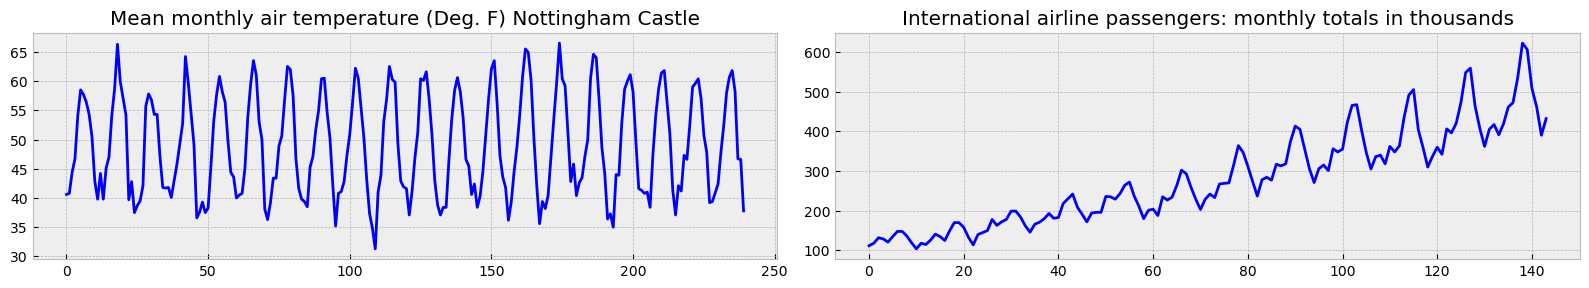

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [5]:
# Из полученных данных на вебинаре возьмем функцию скользящего среднего (согласно заданию)

def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

### Первый ряд для анализа: Mean monthly air temperature (Deg. F) Nottingham Castle

In [6]:
series_1 = mean_monthly_temp["Deg"]

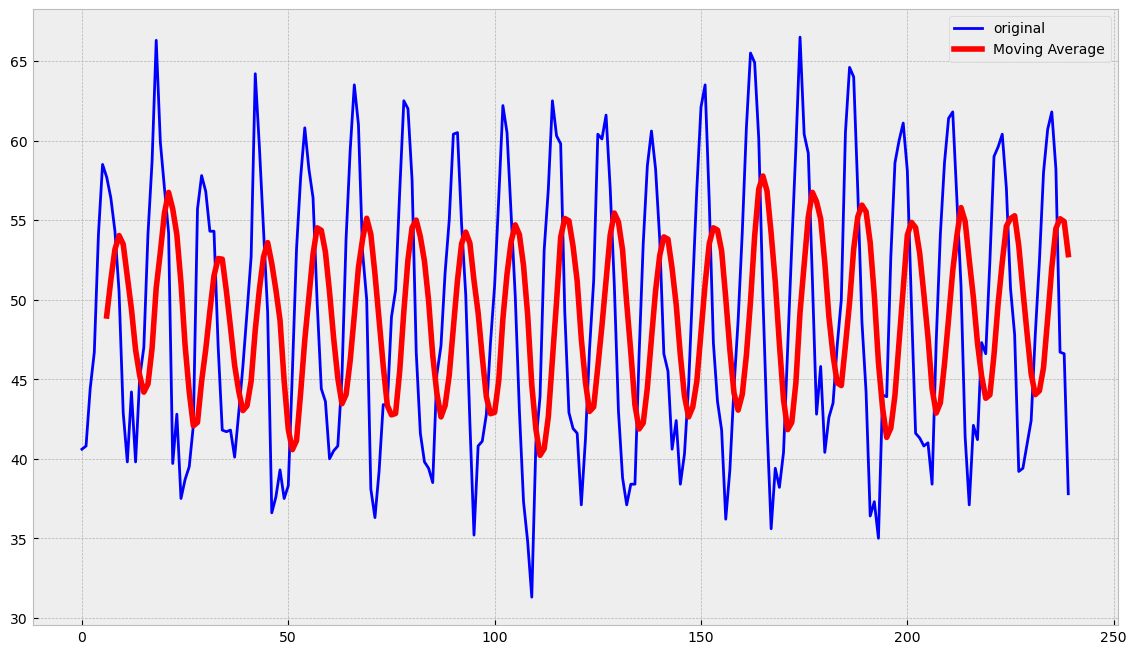

In [7]:
ser = moving_average(series_1, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    # plt.title(series_1.name)
    plt.legend()

> Мы видим сдвиг и то, что модель пока не супер приближена к исходным данным. \
> Воспользуемся взвешенной скользящей средней

In [8]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

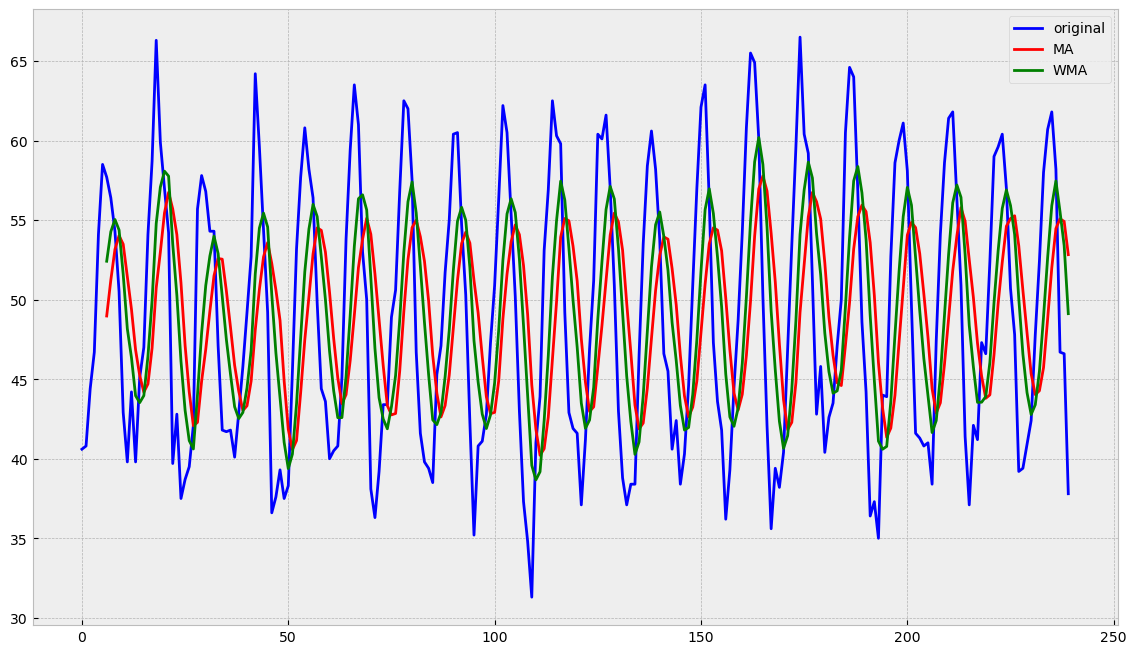

In [9]:
wma = weighted_moving_average(series_1, 7, [1,2,3,4,5,6,7])
ma = moving_average(series_1, 7)

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

In [10]:
# series = mean_monthly_temp["Deg"]
wma_fib = weighted_moving_average(series_1, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series_1, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series_1, 7, [1,2,4,8,16,32,64])

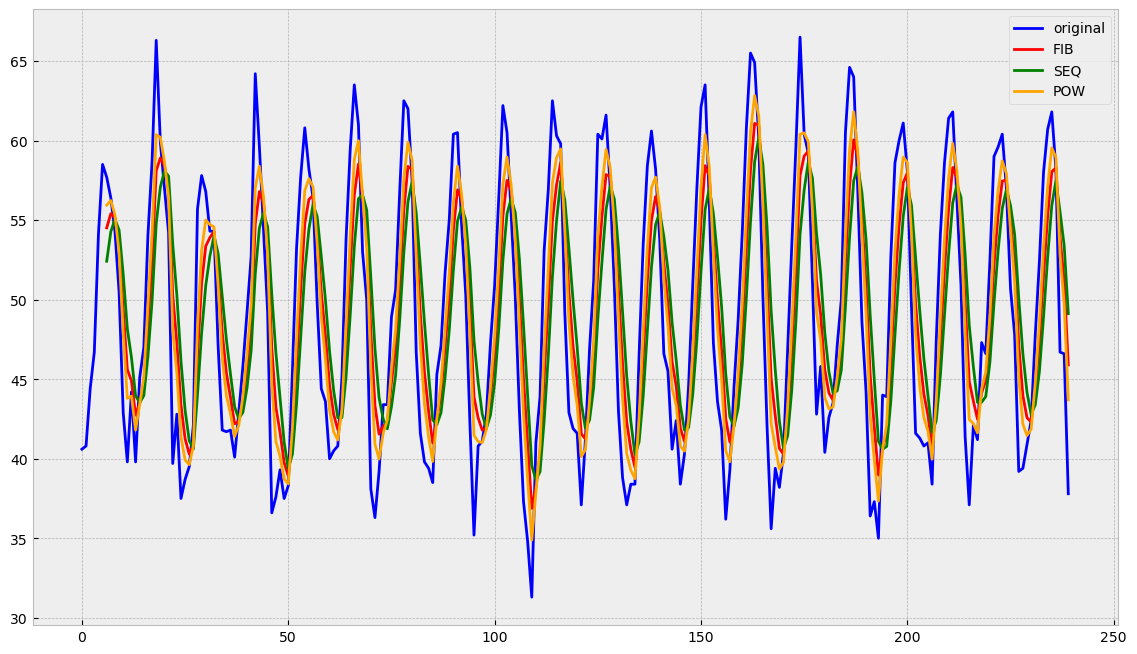

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

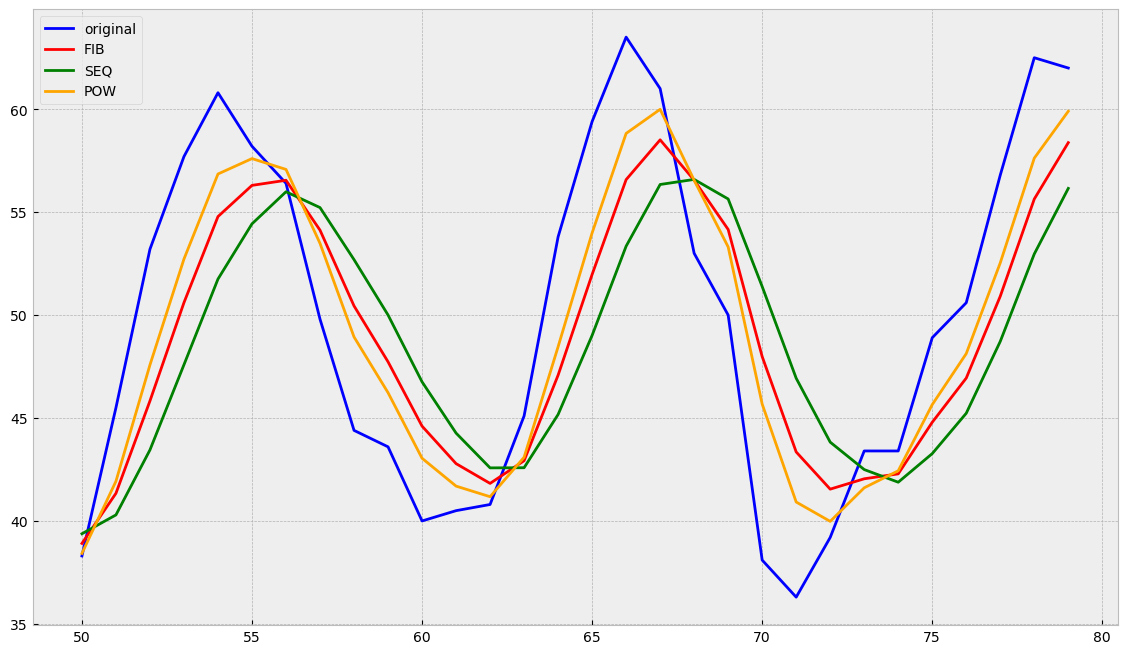

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1[50:80], color='blue',label='original')
    
    plt.plot(wma_fib[50:80], color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq[50:80], color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow[50:80], color='orange', linewidth='2', label='POW')
    plt.legend()

> Из полученых данных видно, что взвешанная скользащая средняя чуть лучше приближена к модели, \
> при этом если мы используем последовательность степени двойки (взято из лекции) в качестве весов, то приблежение более точное. \
> Но пока этого не достаточно попробуем другие способы.

In [13]:
# Экспоненциальное сглаживание

def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

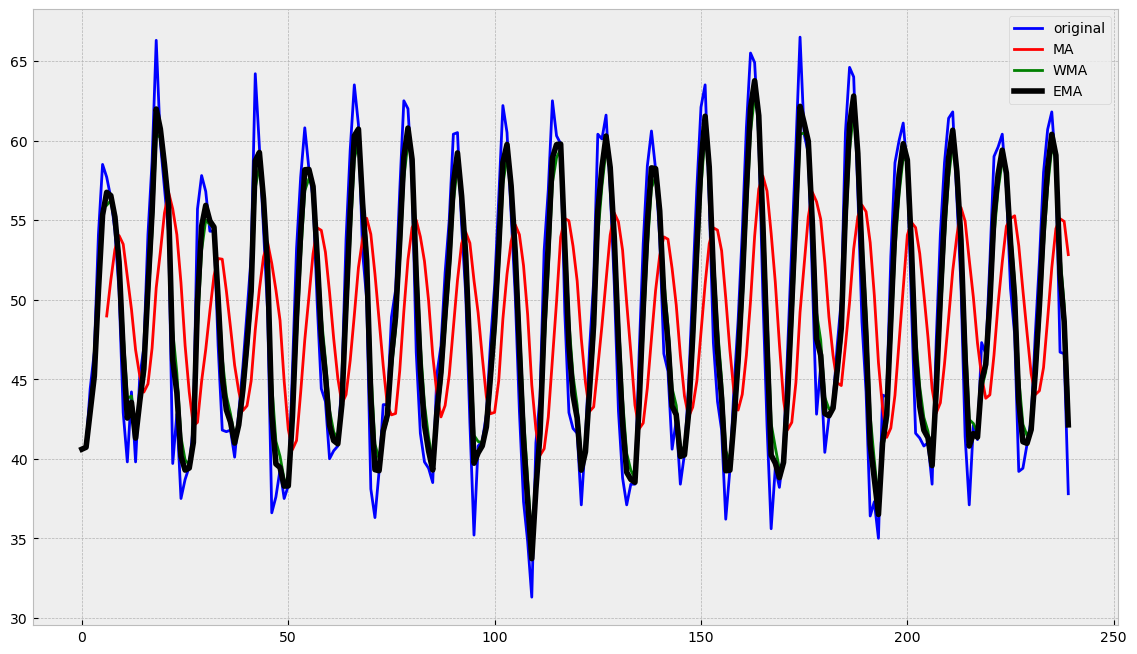

In [14]:
ema = exponential_moving_average(series_1, 0.6)
wma = wma_pow
ma = moving_average(series_1, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

> При таких параметрах WMA и EMA практически идентичны и более приближены к оригиналу.

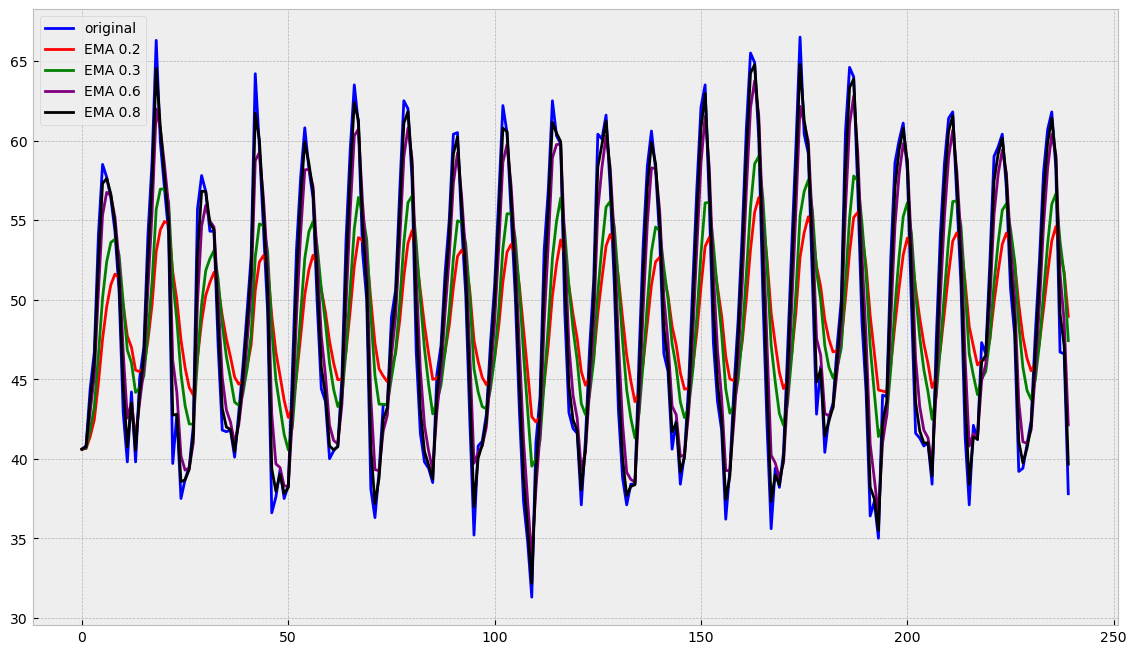

In [15]:
# для наглядности попробуем вручную подобрать параметры альфа

alphas = [0.2,0.3,0.6,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_1, color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(series_1, alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

> Из полученых данных наглядно видно, что чем меньше альфа, тем больше влияния оказывают \
> предыдущие предсказанные значения, и тем сильнее сглаживается ряд. (из лекции)

In [16]:
# Двойное экспоненциальное сглаживание

def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [17]:
def plot_dema(series, alpha, beta):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

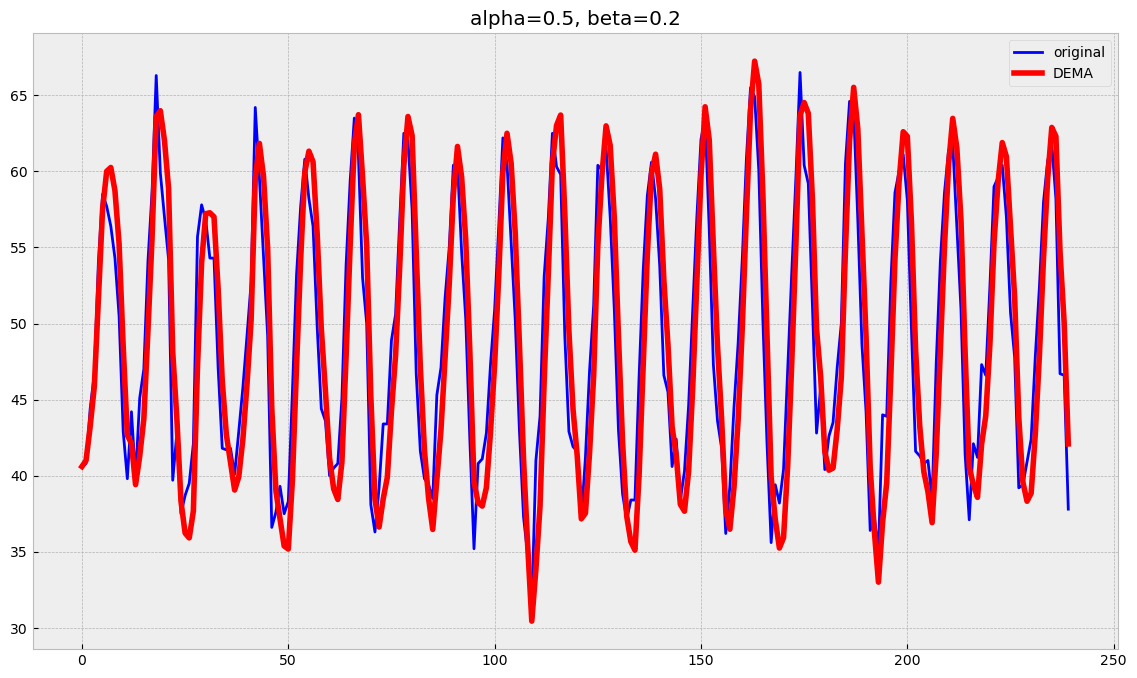

In [18]:
plot_dema(series_1, 0.5, 0.2)

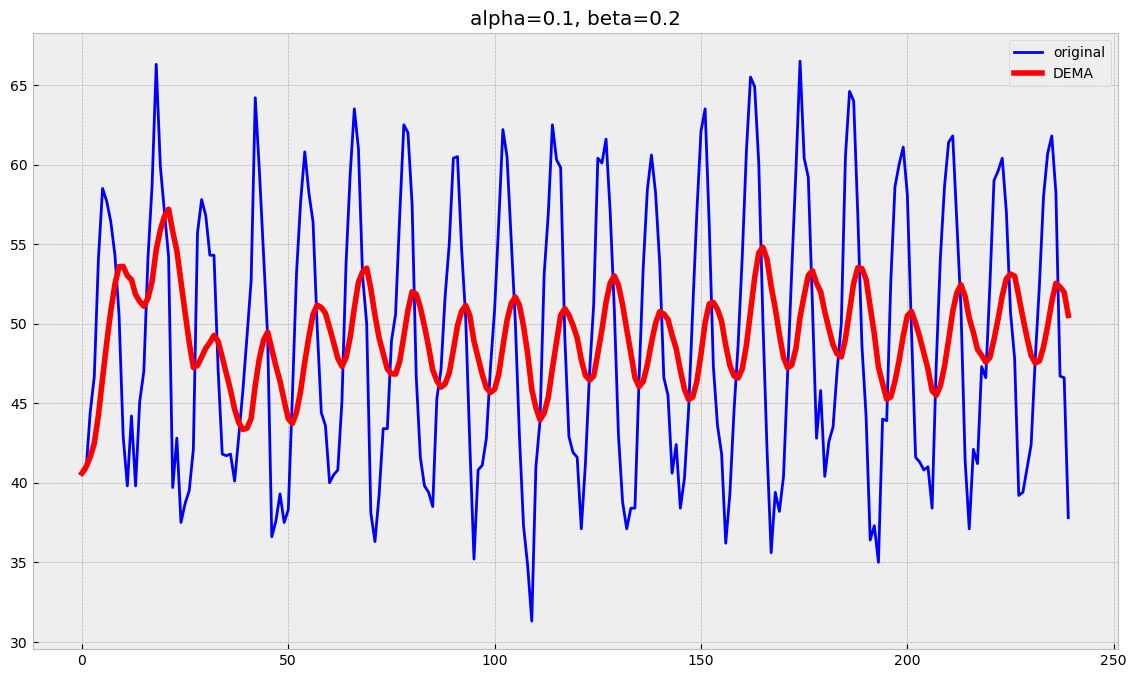

In [19]:
plot_dema(series_1, 0.1, 0.2)

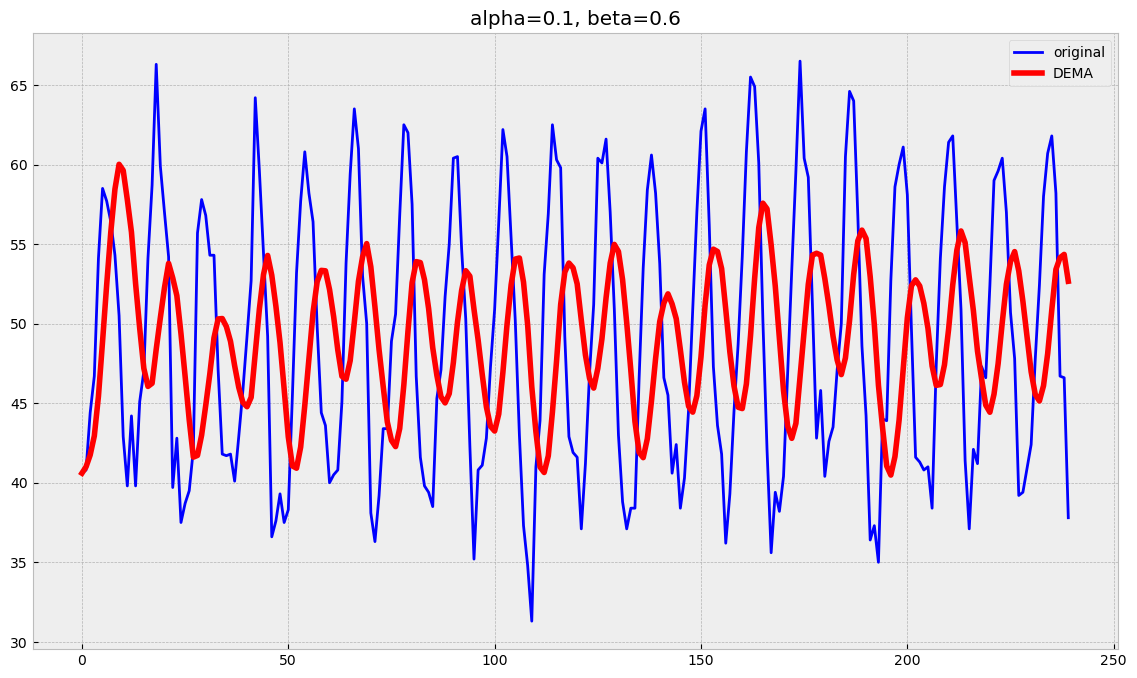

In [20]:
plot_dema(series_1, 0.1, 0.6)

> Альфа отвечает за сглаживание ряда вокруг тренда, бета - за сглаживание самого тренда. \
> Чем больше значения, тем более значимыми будут последние наблюдения и менее значимой будет история.

In [21]:
# метод Хольта-Винтерса

def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [22]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals


In [23]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [24]:
def plot_tema(alpha, beta, gamma, ser, ser_to_plot = ser, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

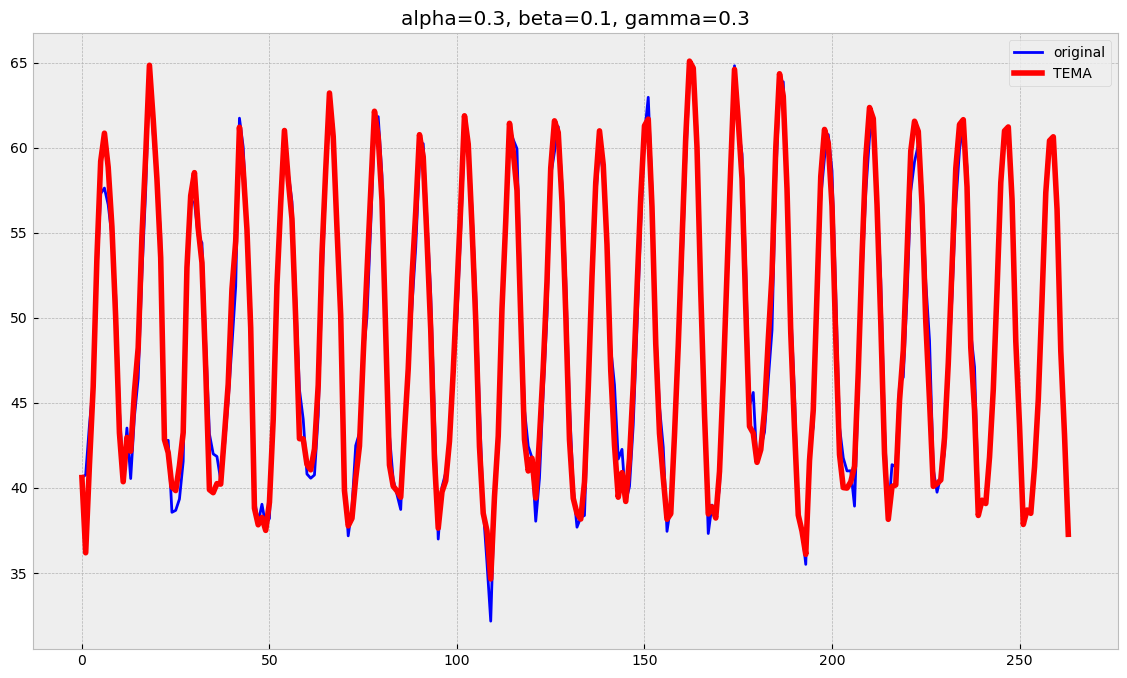

In [25]:
plot_tema(0.3, 0.1, 0.3, ser = series_1)

> Судя по полученным данным, в данном ряду с большой долей вероятности присутствует сезонность, о чем я даже не подозревал в первом ДЗ. 

### Подбор параметров

In [26]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [27]:
train, test, val = series_1[:140], series_1[120:170], series_1[140:]

In [28]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [29]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [30]:
# opt = minimize(mse, x0=[0,0,0], method="Nelder-Mead", bounds = ((0, 1), (0, 1), (0, 1)))

In [31]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 206.744144956963
        x: [ 8.389e-01  5.919e-03  1.000e+00]
      nit: 13
      jac: [ 2.558e-05  3.098e-04 -6.939e-01]
     nfev: 68
     njev: 17
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


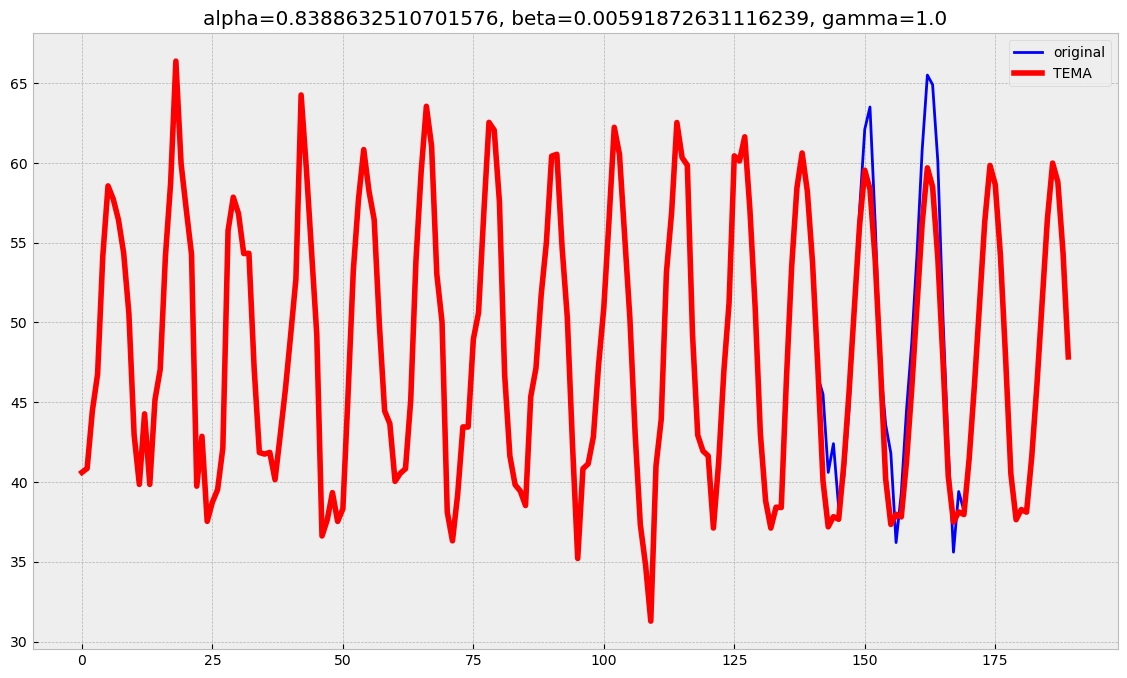

In [32]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series_1[:170], n_preds=len(test))

> Судя по полученным данным мне удалось приблизить данные, с ошибкой 206.74 \
> По графику видно, что предсказание не так уж и плохо получилось, но есть куда стремится далее.\
> Так же по моим опытам стало ясно, что в первом ДЗ у меня были не совсем точные исследования.

### Второй ряд для анализа: International airline passengers: monthly totals in thousands

Изучим второй ряд аналогичными методами и посмотрим на различия между данными и результатами, полученными в исследовании.International airline passengers: monthly totals in thousands

In [33]:

series_2 = airlines_passengers["Count"]

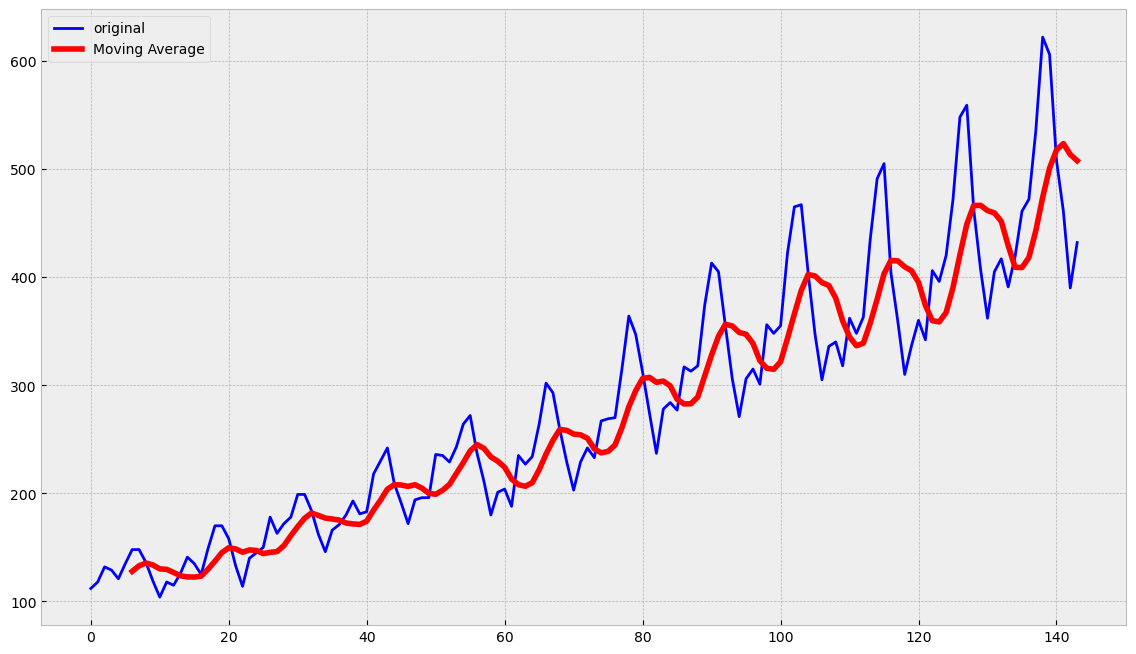

In [34]:
ser = moving_average(series_2, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_2, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

> По первым исследования, видно что это временной ряд с трендом и возможно с сезонностью.\
> Скользящее среднее в данном случае явно не подходит и будем идти дальше

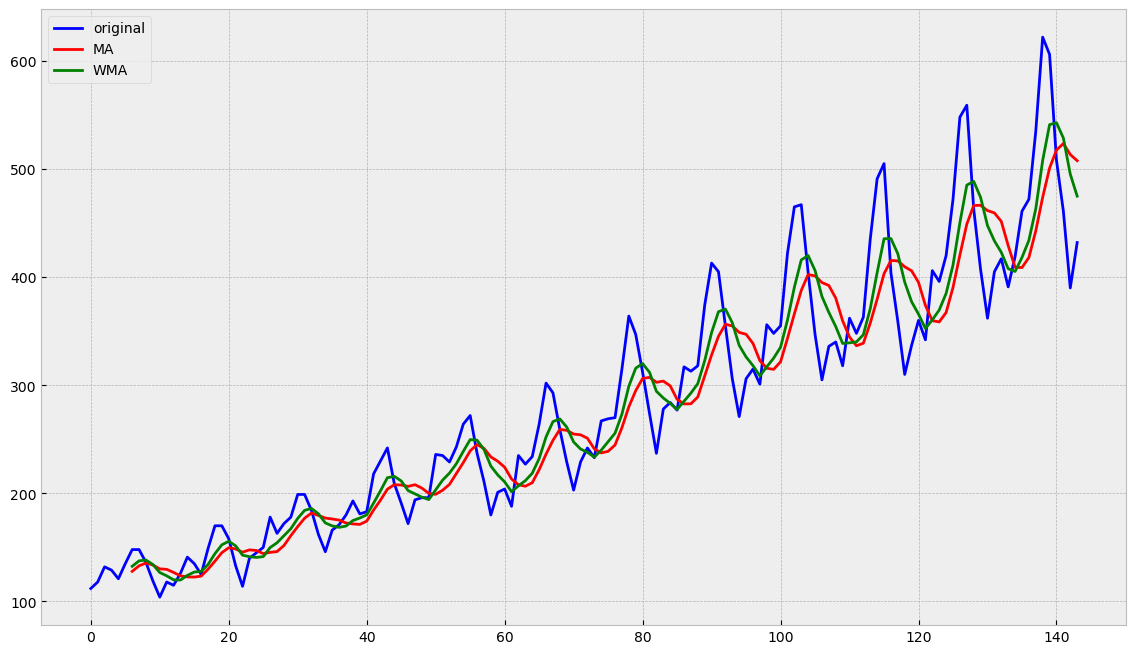

In [35]:
wma = weighted_moving_average(series_2, 7, [1,2,3,4,5,6, 7])
ma = moving_average(series_2, 7)

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_2, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

In [36]:
wma_fib = weighted_moving_average(series_2, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series_2, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series_2, 7, [1,2,4,8,16,32,64])

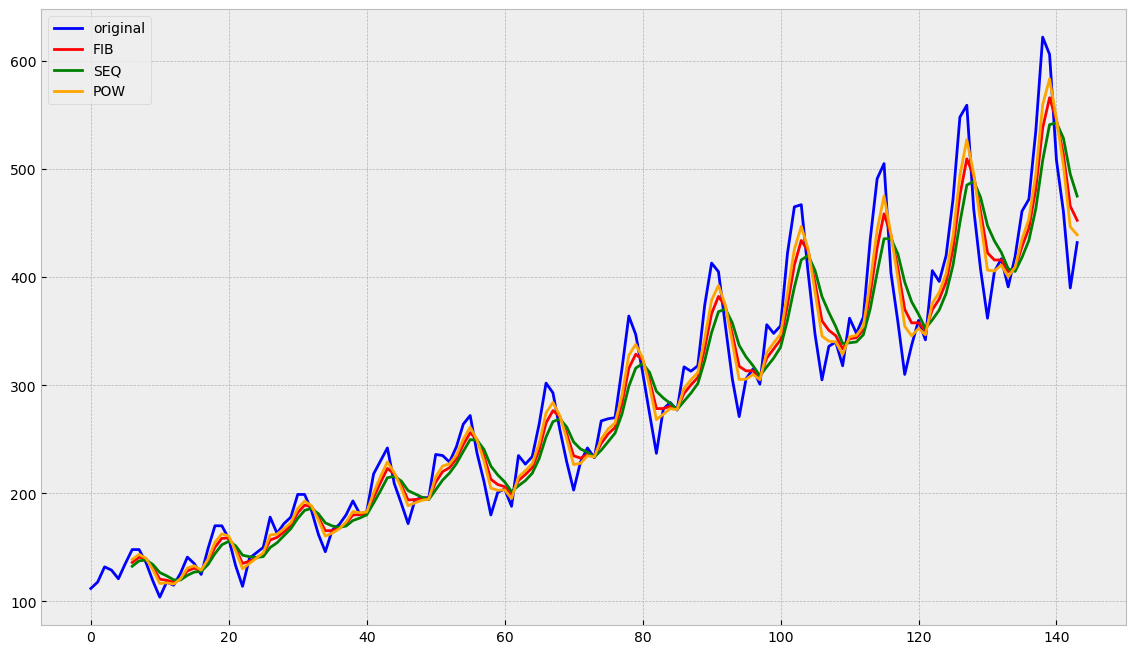

In [37]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_2, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

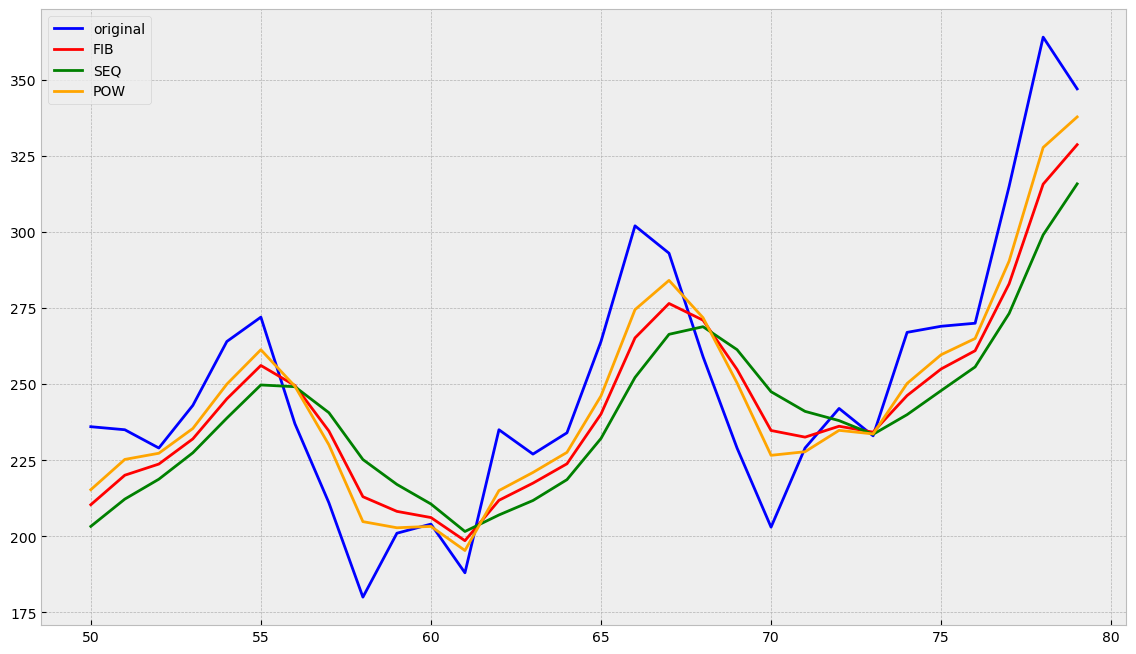

In [38]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_2[50:80], color='blue',label='original')
    
    plt.plot(wma_fib[50:80], color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq[50:80], color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow[50:80], color='orange', linewidth='2', label='POW')
    plt.legend()

> В принципе получили примерно тоже самое, что при исследовании первого временного ряда.\
> Но опять же сдвиг присутсвует и использоавть пока нельзя

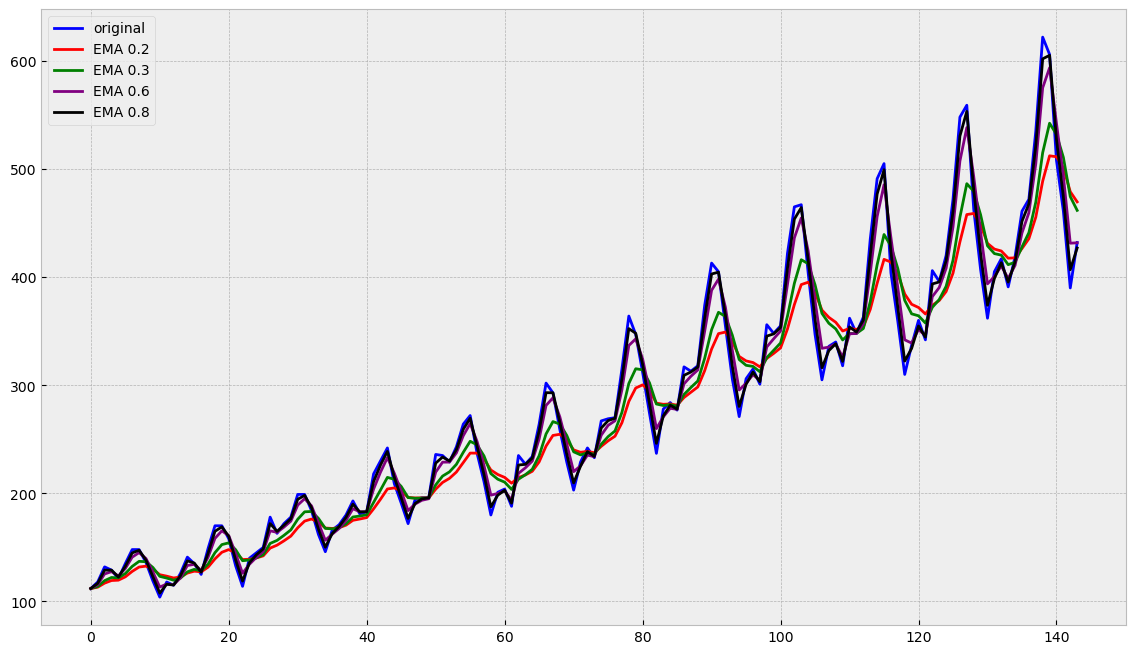

In [39]:
# Экспоненциальное сглаживание.

alphas = [0.2,0.3,0.6,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_2, color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(series_2, alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

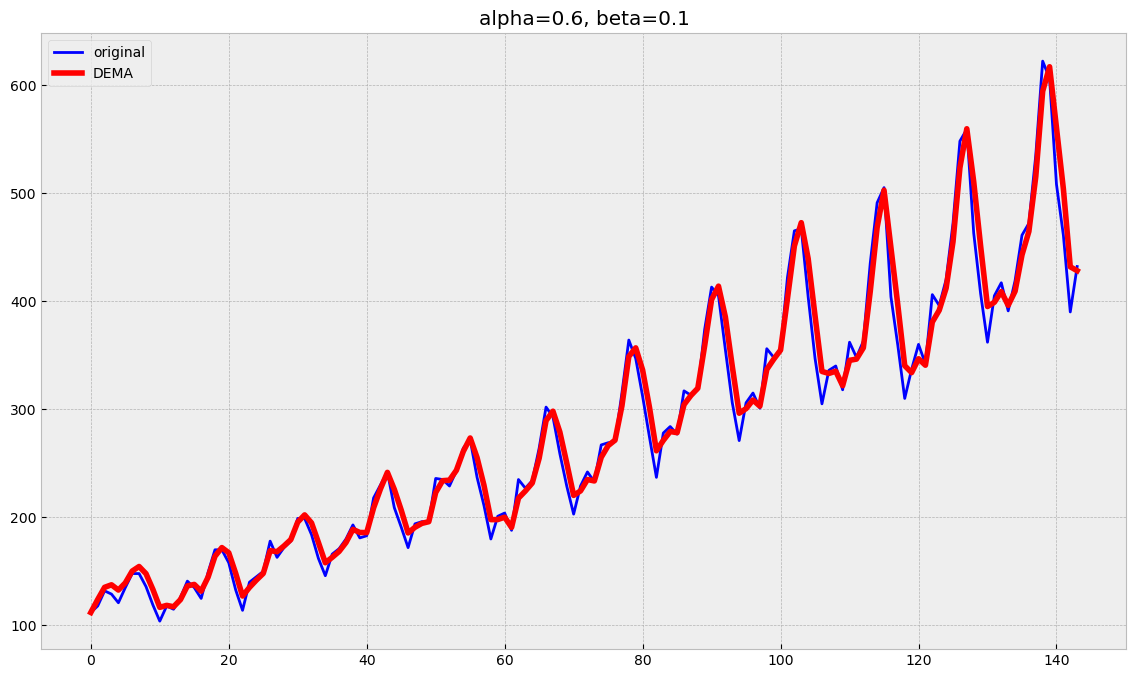

In [40]:
plot_dema(series_2, 0.6, 0.1)

Метод Хольта-Винтерса

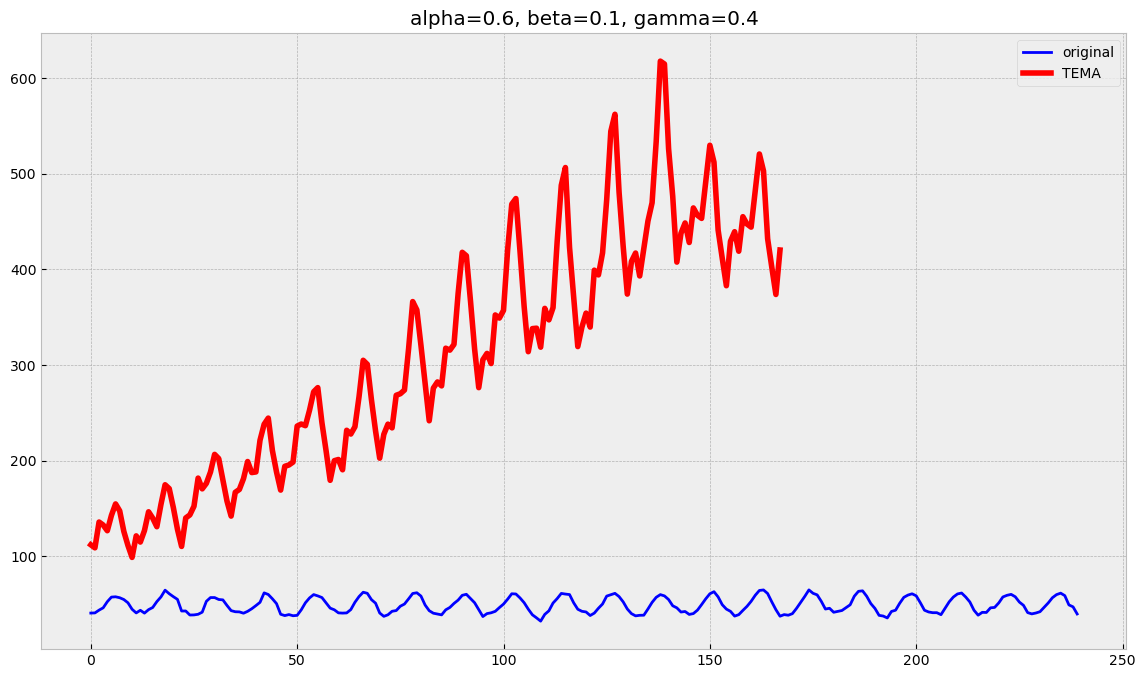

In [41]:
plot_tema(0.6, 0.1, 0.4, ser = series_2)

> Как видим результат стал просто ужасающим и это означает, что данный метод не подходит и в данном ряду сезонность не присутствует.

### Подбор параметров

In [42]:
train, test, val = series_2[:85], series_2[70:95], series_2[85:]

In [43]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [44]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3175.560733166532
        x: [ 8.455e-01  1.102e-02  1.000e+00]
      nit: 21
      jac: [-4.311e-02 -6.362e-02 -1.603e+01]
     nfev: 92
     njev: 23
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


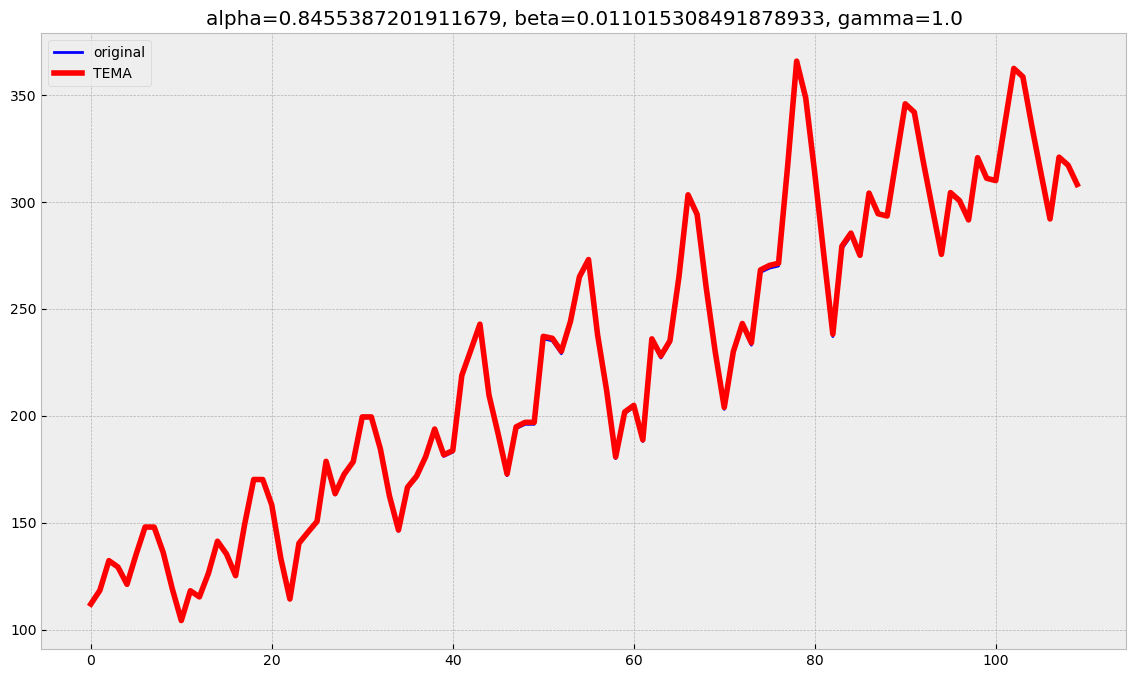

In [45]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series_2[:85], n_preds=len(test))

> C ошибкой 3175.56 мы смогли приблизить модель, по графику видно что прогноз так же не плохо получился.\
> Основная мысль после проведенных анализов, это что первое ДЗ было конечно сделано, но данные, которые я \
> там получил поставились под сомнение на 95%. ИМХО.
>
> Но при прочих равных, выше указанные анализы и полученные предсказания будут работать на ограниченом \
> временном отрезке, для получения более точных данных необходимо больше данных